# Star Wars Survey

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which are available in their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

You can find the meaning of each column in the README file.

# Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic


In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [6]:
# Let's remove remove rows with NaN value in RespondentID column
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [7]:
star_wars['RespondentID'].isnull().sum()

0

Let's now have a look at the next two columns:

* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

Both columns have yes/no values to above questions or NaN for respondents choose not to respond. We will convert yes/no values to boolean values(True/False) and leave NaN values as is. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [10]:
yes_no = {'Yes': True, 'No': False}

In [11]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

In [12]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [14]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [15]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Have You Seen Star Wars Films?

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

* Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [16]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [17]:
# rename the columns
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen1',
                         'Unnamed: 4' : 'seen2', 
                         'Unnamed: 5': 'seen3', 
                         'Unnamed: 6': 'seen4', 
                         'Unnamed: 7': 'seen5', 
                         'Unnamed: 8': 'seen6'})

In [18]:
import numpy as np

In [19]:
for s in range(3, 9):
    print(star_wars.iloc[0, s])


Star Wars: Episode I  The Phantom Menace
Star Wars: Episode II  Attack of the Clones
Star Wars: Episode III  Revenge of the Sith
Star Wars: Episode IV  A New Hope
Star Wars: Episode V The Empire Strikes Back
Star Wars: Episode VI Return of the Jedi


In [20]:
#Now, let's create map to replace the name of the episode with `True` and np.Nan with `False`:

sw_map = {'Star Wars: Episode I  The Phantom Menace': True,
         np.nan: False,
         'Star Wars: Episode II  Attack of the Clones': True,
         'Star Wars: Episode III  Revenge of the Sith': True,
         'Star Wars: Episode IV  A New Hope': True,
         'Star Wars: Episode V The Empire Strikes Back': True,
         'Star Wars: Episode VI Return of the Jedi': True}

In [21]:
# let's apply map to columns:

for s in star_wars.columns[3:9]:    
    star_wars[s] = star_wars[s].map(sw_map)    

In [22]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen1,seen2,seen3,seen4,seen5,seen6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Star Wars Films Ranking

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
* Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
* Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
* Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [23]:
# convert columns to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [24]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [25]:
# rename the columns
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2', 
    'Unnamed: 11': 'ranking_3', 
    'Unnamed: 12': 'ranking_4', 
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'})

In [26]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen1,seen2,seen3,seen4,seen5,seen6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Highest Ranking Episode

In [27]:
mean_rating = star_wars[star_wars.columns[9:15]].mean()

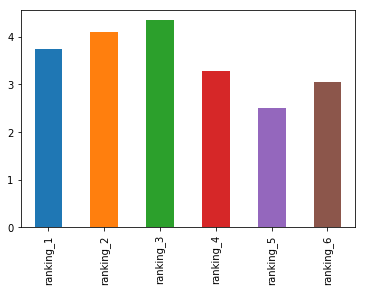

In [28]:
mean_rating.plot.bar()
plt.show()

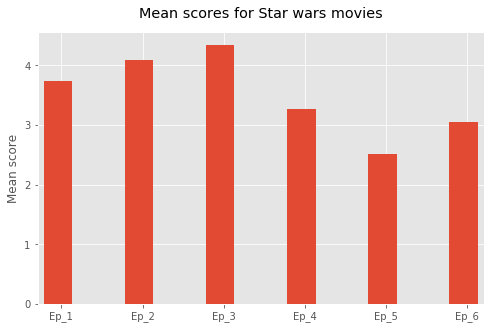

In [29]:
plt.style.use('ggplot')

means = []

for col in star_wars.columns[9:15]:
    means.append(star_wars[col].mean())


ind = np.arange(len(means))+.25
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ind, means, width)
plt.title('Mean scores for Star wars movies', y=1.03)
plt.xlim(0,5.5)
ax.set_xticks(ind + width/8)
ax.set_xticklabels(['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6'])
plt.ylabel('Mean score')
plt.show()


so far, we have cleaned up the data, rename the several columns and calculated averge rankings for each movies. The above bar chart shows first three movies(Episodes 4, 5 and 6) came out in 70's to 80's had lower mean, which means higher ratings. Among the three, Empire Strikes Back had highest ratings.

# Most Seen Episode

In [30]:
star_sum = star_wars[star_wars.columns[3:9]].sum()

In [31]:
star_sum

seen1    673
seen2    571
seen3    550
seen4    607
seen5    758
seen6    738
dtype: int64

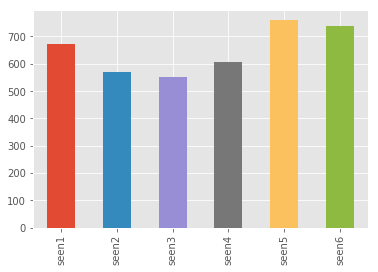

In [32]:
star_sum.plot.bar()
plt.show()

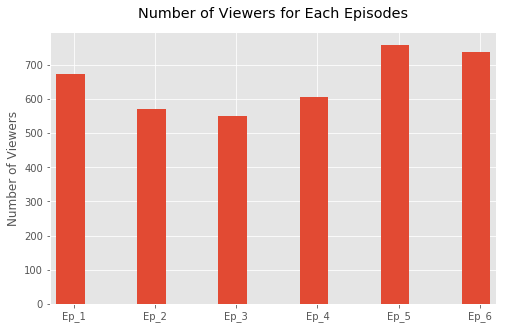

In [33]:
plt.style.use('ggplot')

seen = []

for col in star_wars.columns[3:9]:
    seen.append(star_wars[col].sum())


ind = np.arange(len(seen))+.25
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(ind, seen, width)
plt.title('Number of Viewers for Each Episodes', y=1.03)
plt.xlim(0,5.5)
ax.set_xticks(ind + width/8)
ax.set_xticklabels(['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6'])
plt.ylabel('Number of Viewers')
plt.show()

# Gender Analysis

Let's compare number of views and ratings for Star Wars episodes for males and females.

In [34]:
# separate the dataset into two datasets by gender
male = star_wars[star_wars['Gender']=='Male']
female = star_wars[star_wars['Gender']=='Female']

In [35]:
# create datasets for number of views and ratings for each gender
male_view = male[male.columns[3:9]].sum()
female_view = female[female.columns[3:9]].sum()
male_rating = male[male.columns[9:15]].mean()
female_rating = female[female.columns[9:15]].mean()

## Compare Number of Viewers by Gender

In [36]:
gender_view = pd.DataFrame({'males': male_view, 'females': female_view})

In [37]:
gender_view

,males,females
seen1,361,298
seen2,323,237
seen3,317,222
seen4,342,255
seen5,392,353
seen6,387,338


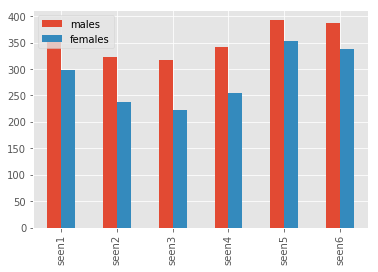

In [38]:
gender_view.plot.bar()

Above bar chart suggest number of views were similar for both gender. Both gender viewed most was Empire Strikes Back and viewed least was Revenge of the Sith.

## Compare the Ratings by Gender

In [39]:
gender_rating = pd.DataFrame({'males': male_rating, 'females': female_rating})

In [40]:
gender_rating

,males,females
ranking_1,4.037825,3.429293
ranking_2,4.224586,3.954660
ranking_3,4.274882,4.418136
ranking_4,2.997636,3.544081
ranking_5,2.458629,2.569270
ranking_6,3.002364,3.078086


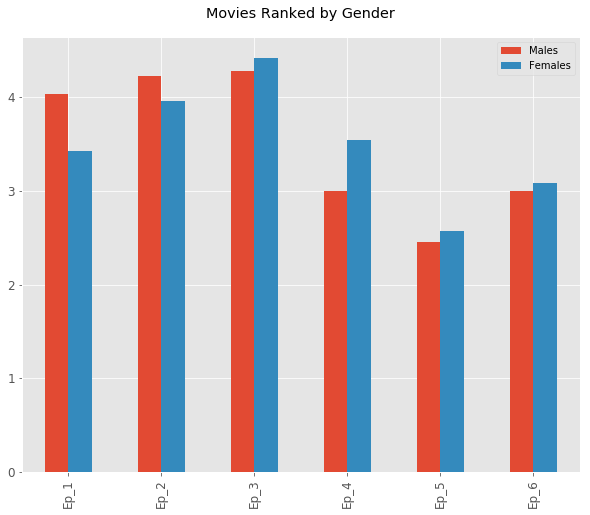

In [41]:
legend = ['Males', 'Females']
gender_rating.plot(kind='bar', fontsize=12, figsize=(10, 8))
plt.title('Movies Ranked by Gender', y=1.03)
plt.xticks(np.arange(6), ['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6'])
plt.legend(legend)
plt.show()

Above bar chart shows both gender gave highest rating to Episode V: Empire Strikes Back

# Star Trek Fans Correlation With The Movies

Let's compare Star Trek Fans and not Star Trek Fans had correlation with number of views.

In [42]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] = \
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].map({'Yes': True, 'No': False})

In [43]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna=False)                         

False    641
True     427
NaN      118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [44]:
star_trek_yes = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']==True]
star_trek_no = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']==False]

In [45]:
star_trek_yes_view = star_trek_yes[star_trek_yes.columns[3:9]].sum()
star_trek_no_view = star_trek_no[star_trek_no.columns[3:9]].sum()

In [46]:
star_trek = pd.DataFrame({'Fan of Star Trek': star_trek_yes_view, 'Not Fan of Star Trek': star_trek_no_view})

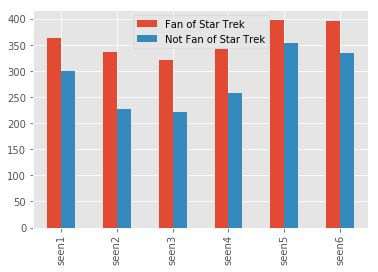

In [47]:
star_trek.plot(kind='bar')

Whether Star Trek Fan or not, both had similar pattern for each episodes. The higher number of Star Trek fans did viewed each episodes than other. 

# Favorite Characters

Who is your favorite character in Star Wars? Let's see whose the respondents favorite and hated characters.

In [48]:
column_name = list(star_wars.iloc[:, 15:29])
column_name

['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28']

In [49]:
characters = ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2-D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda']

In [50]:
char_name_dict = {}
i = 0
for c in column_name:
    char_name_dict[c] = characters[i]
    i += 1
star_wars = star_wars.rename(char_name_dict, axis=1)
    

In [51]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen1,seen2,seen3,seen4,seen5,seen6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We will convert the ranking system to numbers so that we can make calculations:

* Very favorably - for each rating the character will receive 2 points
* Somewhat favorably - for each rating the character will receive 1 point
* Neither favorably nor unfavorably (neutral) - 0 points
* Somewhat unfavorably - for each rating the character will be deducted 1 point
* Very unfavorably - for each rating the character will be deducted 2 points
* Unfamiliar (N/A) - 0 points
* NaN - 0 points

In [52]:
char_rate = {'Very favorably': 2, 'Somewhat favorably': 1, 'Neither favorably nor unfavorably (neutral)': 0, 'Unfamiliar (N/A)': 0, 
             'Somewhat unfavorably': -1, 'Very unfavorably': -2, np.nan: 0}

In [53]:
for s in star_wars.columns[15:29]:
    star_wars[s] = star_wars[s].map(char_rate)
    

In [54]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen1,seen2,seen3,seen4,seen5,seen6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe???,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,2,2,2,2,2,2,2,0,0,2,2,2,2,2,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,2,2,2,2,2,1,2,1,-1,2,2,2,2,2,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,2,1,1,-1,2,-2,1,0,2,1,1,-2,1,1,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


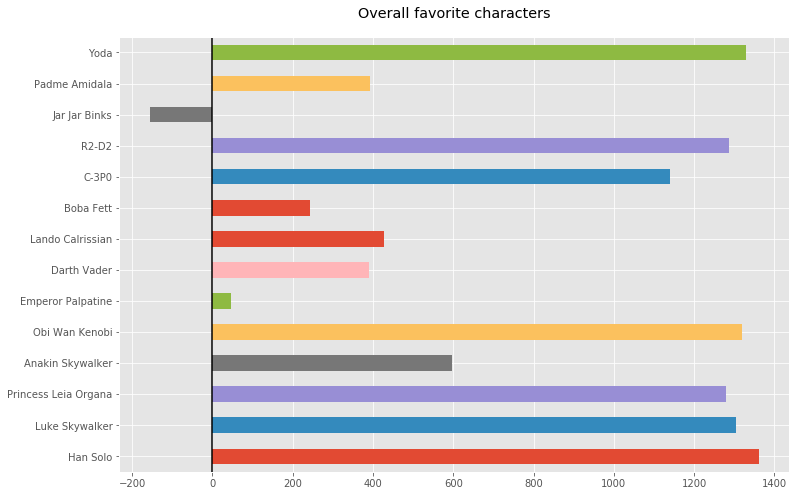

In [55]:
star_wars[star_wars.columns[15:29]].sum().plot(kind='barh', figsize=(12,8))
plt.title('Overall favorite characters', y=1.03)
plt.axvline(c='k')

The respondents most favorite character was Han Solo and least favorite was Jar Jar.

# Gender Preference Over Characters

In [56]:
females = star_wars[star_wars['Gender']=='Female']
males = star_wars[star_wars['Gender']=='Male']

In [57]:
females_fav = []
males_fav = []
for s in characters:
    females_fav.append(females[s].sum())
    males_fav.append(males[s].sum())

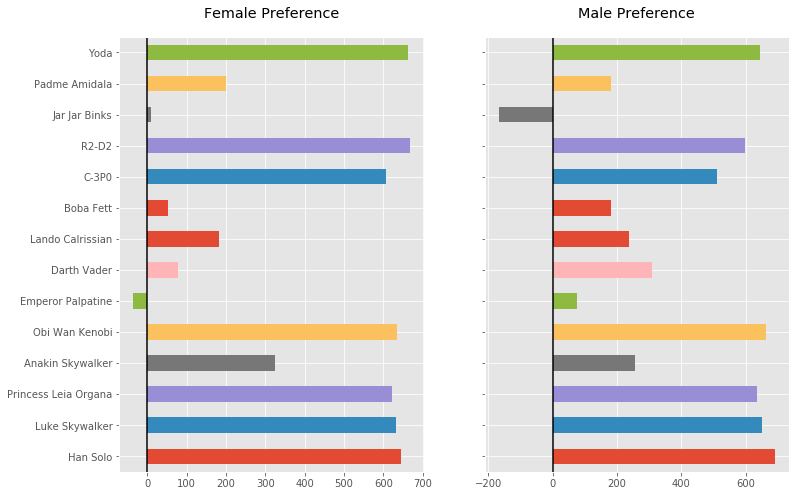

In [58]:
fig = plt.figure(figsize=(18,10))
#bp=np.arange(14) + 0.75

ax1 = fig.add_subplot(1,2,1)
females[females.columns[15:29]].sum().plot(kind='barh', figsize=(12,8))
plt.title('Female Preference', y=1.03)
plt.axvline(c='k')

ax2 = fig.add_subplot(1,2,2)

males[males.columns[15:29]].sum().plot(kind='barh', figsize=(12,8))
ax2.set_yticklabels([])
plt.title('Male Preference', y=1.03)
plt.axvline(c='k')



plt.show()

Both gender loved Han Solo the most, although females loved Yoda just as much. The striking difference was females least favored Emperor Palpatine whereas males least favored Jar Jar.

# Education Level Preference

In [59]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [60]:
education_ranking = star_wars.pivot_table(index='Education', values=star_wars.columns[9:15])

In [61]:
education_ranking

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Education,,,,,,
Bachelor degree,3.828244,4.290076,4.521073,3.114504,2.309160,2.931298
Graduate degree,3.822222,4.225664,4.500000,3.199115,2.323009,2.920354
High school degree,3.802817,3.746479,4.126761,3.211268,2.873239,3.239437
Less than high school degree,5.000000,5.333333,3.666667,2.666667,1.000000,3.333333
Some college or Associate degree,3.551181,3.885827,4.102362,3.503937,2.783465,3.173228


Text(0.5,1.03,'Movie rankings by education level')

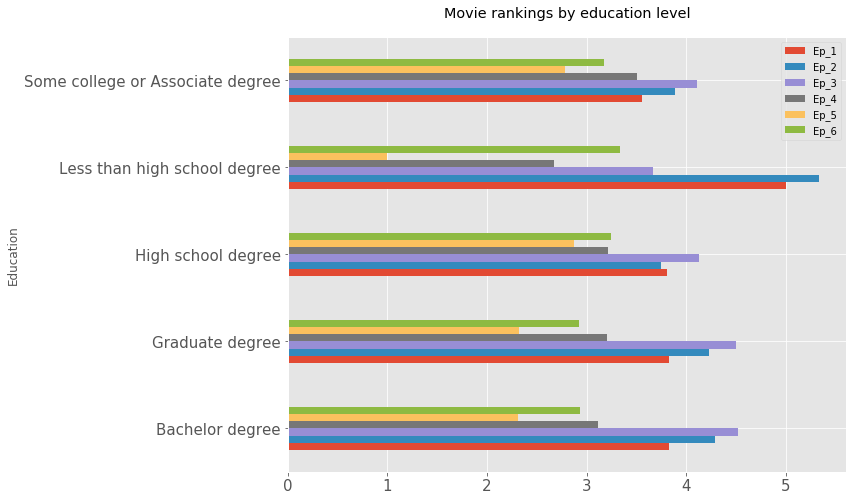

In [62]:
legend = ['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6']
education_ranking.plot(kind='barh', figsize=(10, 8), fontsize=15)
plt.legend(legend)
plt.title('Movie rankings by education level', y=1.03)

Almost all level of education ranked Episode III: Revenge of Sith least, except for education level less than High School degree. This group least prefer Episode II: Attack of The Clone. All level of education gave highest rating to Episode V: The Empire Strikes Back.

# Location Preference

In [63]:
location_ratings = star_wars.pivot_table(index='Location (Census Region)', values=star_wars.columns[9:15])
location_ratings

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Location (Census Region),,,,,,
East North Central,3.723881,4.074627,4.410448,3.358209,2.373134,3.059701
East South Central,3.875000,4.593750,4.375000,2.875000,2.250000,3.031250
Middle Atlantic,3.924731,4.215054,4.413043,3.064516,2.440860,2.924731
Mountain,4.000000,4.000000,4.279412,2.970588,2.794118,2.955882
New England,4.203390,4.166667,4.133333,3.083333,2.516667,2.866667
Pacific,3.582192,3.821918,4.171233,3.219178,2.739726,3.465753
South Atlantic,3.684211,4.180451,4.443609,3.406015,2.398496,2.887218
West North Central,3.671053,4.105263,4.355263,3.368421,2.552632,2.947368
West South Central,3.394737,4.118421,4.473684,3.657895,2.421053,2.934211


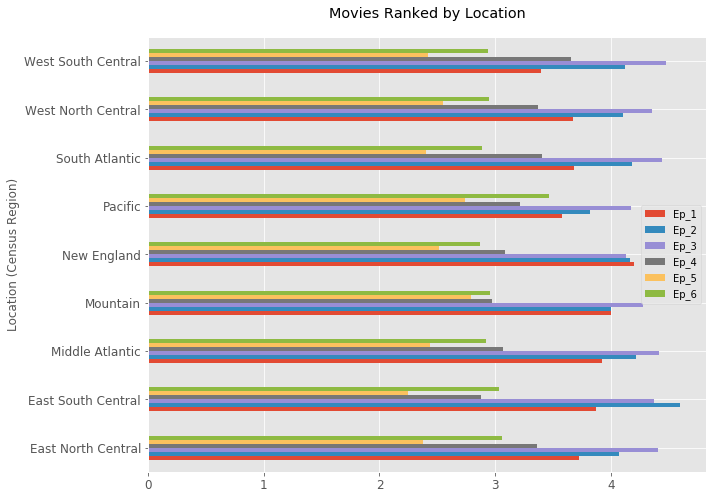

In [64]:
legend = ['Ep_1', 'Ep_2', 'Ep_3', 'Ep_4', 'Ep_5', 'Ep_6']
location_ratings.plot(kind='barh', fontsize=12, figsize=(10, 8))
plt.title('Movies Ranked by Location', y=1.03)
plt.legend(legend)
plt.show()

The above chart shows almost all locations least ranked Episodes 3 except New England and East South Central regions. But all locations ranked Episode 5 best.

# Conclusion

In this guided project we analysed Star Wars survey by the team at FiveThirtyEight. The aim of their questionnaire was to answer the question does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

We analyzed this question by gender, location and education level and analysis showed Episode 5 was the most viewed and received highest rank from respondents. As expected Han Solo was most favored character and Jar Jar was least favored character. This was surprising to me that Emperor Palpetine was more favored at least to the male respondents.